# Load Factor analysis

The Load Factor Analysis determines the ratio between any KPI and its nominal value.
    eg. if the nominal power of a CV boiler system is 14 kW, and it consumes 10 kW, the Load Factor is 0.71

### Imports

In [4]:
import opengrid as og
import pandas as pd

In [5]:
plt = og.plot_style()

### Demo data
We will be taking the hourly power consumption of a house for a week

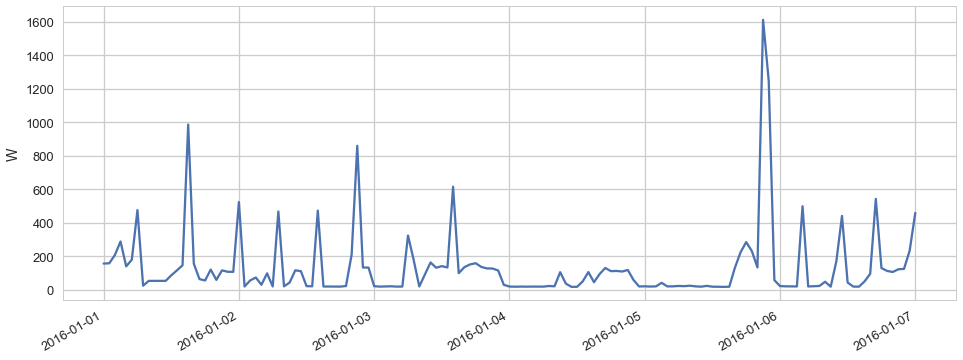

In [6]:
ts = og.datasets.get('electricity_2016_hour')
ts = ts['e1de'].truncate(after=pd.Timestamp('20160107'))

ax = ts.plot()
fig = ax.set_ylabel('W')

## Compute some load factors

First, let's take the load factor without resampling or supplying a norm. This tells us the percentage of the maximum power.

In [8]:
lf1 = og.analysis.load_factor(ts)

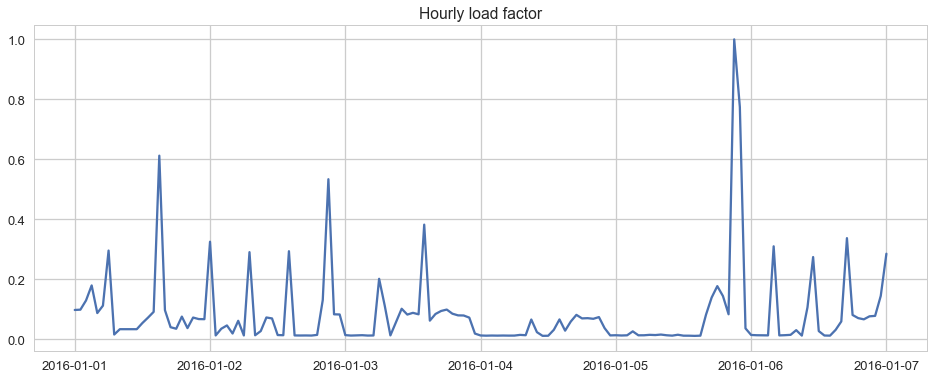

In [12]:
fig = plt.plot(lf1.index, lf1.values, marker='', linestyle='-')
title = plt.title('Hourly load factor')

This analysis shows that the hourly power consumption of this house seldom approaches the maximum power. You could say that the electricity connection has been over dimensioned.

Suppose that the inhabitant of this house is able to shift his consumption, give or take a few hours. Would he be able to keep his maximum power consumption under 800W?

Let's try by running a load factor analysis over 3 hours with a norm of 800

In [28]:
lf2 = og.analysis.load_factor(ts, resolution='3h', norm=800)

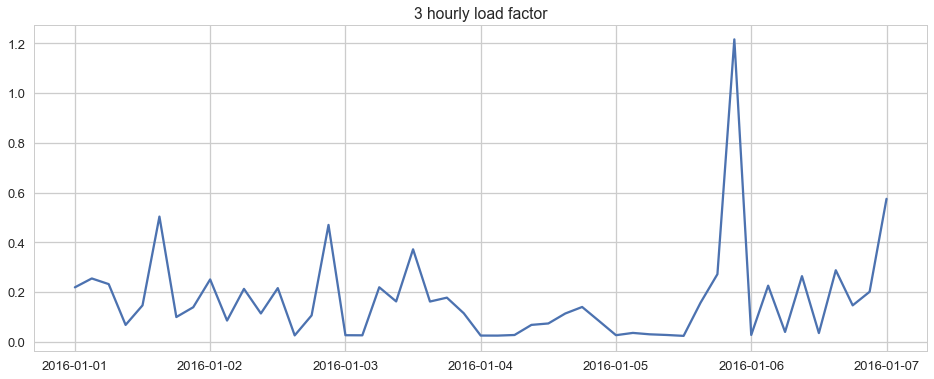

In [29]:
fig = plt.plot(lf2.index, lf2.values, marker='', linestyle='-')
title = plt.title('3 hourly load factor')

The answer is no, since the load factor exceeds 1.